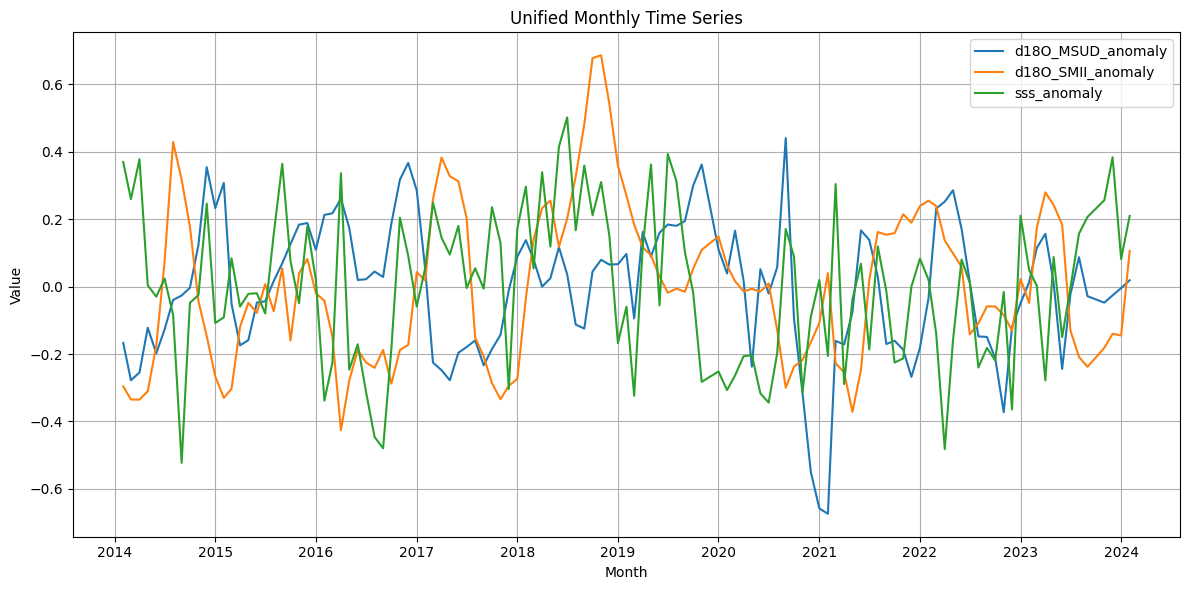

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the unified dataset
df = pd.read_csv("unified_anomaly_datasets.csv")
df["month"] = pd.to_datetime(df["month"].astype(str))  # convert Period to datetime for plotting
df = df.dropna()

# Plot each column
plt.figure(figsize=(12, 6))
for col in df.columns:
    if col != "month" and col != "sos":
        plt.plot(df["month"], df[col], label=col)

plt.title("Unified Monthly Time Series")
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

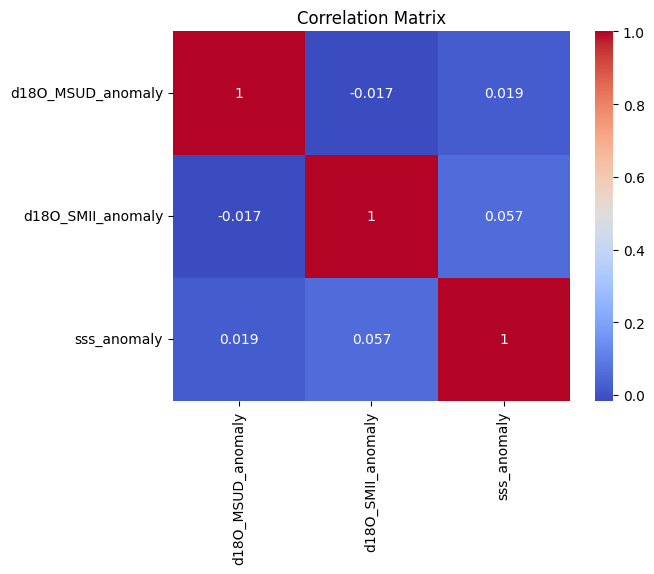

In [6]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Complementary Salinity Data
correlation_matrix = df[['d18O_MSUD_anomaly', 'd18O_SMII_anomaly', 'sss_anomaly']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

                            OLS Regression Results                            
Dep. Variable:      d18O_MSUD_anomaly   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.04297
Date:                Mon, 11 Aug 2025   Prob (F-statistic):              0.836
Time:                        15:10:01   Log-Likelihood:                 24.405
No. Observations:                 119   AIC:                            -44.81
Df Residuals:                     117   BIC:                            -39.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.018     -0.152      0.8

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_79799/4166051809.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_79799/4166051809.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


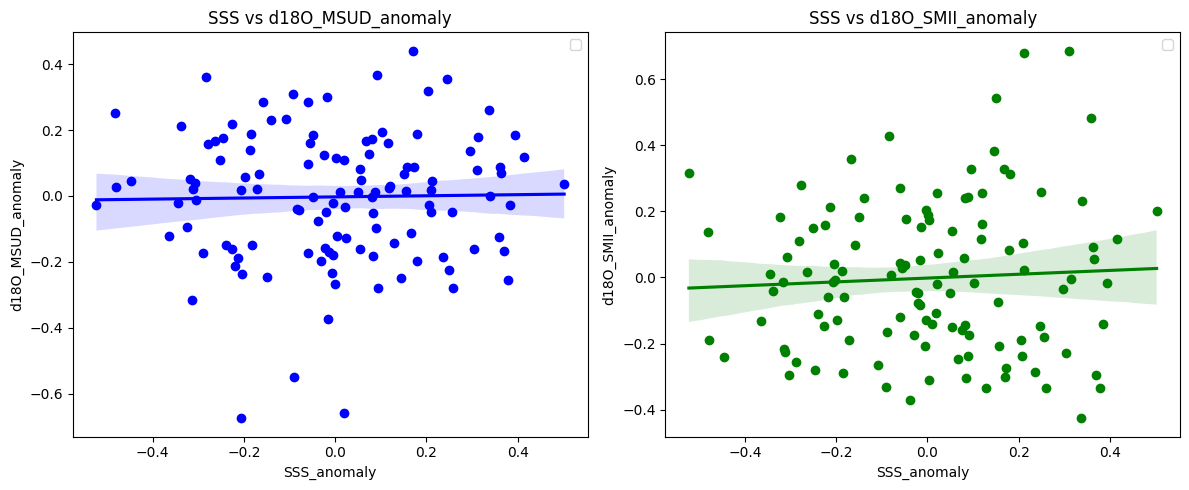

In [8]:
# Multiple Linear Regression
X = df[['sss_anomaly']]
y = df['d18O_MSUD_anomaly']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled).fit()
print(model.summary())

# Visualize
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(df['sss_anomaly'], df['d18O_MSUD_anomaly'], color='blue')
sns.regplot(x='sss_anomaly', y='d18O_MSUD_anomaly', data=df, scatter=False, ax=axs[0], color='blue', line_kws={'label': 'Best Fit Line'})
axs[0].legend()
axs[0].set_title("SSS vs d18O_MSUD_anomaly")
axs[0].set_xlabel("SSS_anomaly")
axs[0].set_ylabel("d18O_MSUD_anomaly")

axs[1].scatter(df['sss_anomaly'], df['d18O_SMII_anomaly'], color='green')
sns.regplot(x='sss_anomaly', y='d18O_SMII_anomaly', data=df, scatter=False, ax=axs[1], color='green', line_kws={'label': 'Best Fit Line'})
axs[1].legend()
axs[1].set_title("SSS vs d18O_SMII_anomaly")
axs[1].set_xlabel("SSS_anomaly")
axs[1].set_ylabel("d18O_SMII_anomaly")

plt.tight_layout()
plt.show()

In [10]:
X_salinity = sm.add_constant(df['sss_anomaly'])
model_salinity = sm.OLS(df['d18O_MSUD_anomaly'], X_salinity).fit()
print("R² for MSUD only:", model_salinity.rsquared)

X_salinity = sm.add_constant(df['sss_anomaly'])
model_salinity = sm.OLS(df['d18O_SMII_anomaly'], X_salinity).fit()
print("R² for SMII only:", model_salinity.rsquared)

R² for MSUD only: 0.00036714740090726394
R² for SMII only: 0.003282439373889501


# Results

Statistically *in*significant negative correlation between SSS and MSUD d18O.
- Pearson correlation of $0.019$.
- Slope coefficient of $0.0038$.
- $p = 0.836 > 0.05$.

In [16]:
# Create lagged features for comp salinity
dataframes = {}
for i in range(-5, 6):
    if i != 0:
        copy = df.copy()
        copy['sss_anomaly'] = df['sss_anomaly'].shift(-i).fillna(method='ffill')
        copy = copy.dropna(subset=['d18O_MSUD_anomaly', 'd18O_SMII_anomaly', 'sss_anomaly'])
        dataframes[i] = copy

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_79799/2418727533.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  copy['sss_anomaly'] = df['sss_anomaly'].shift(-i).fillna(method='ffill')


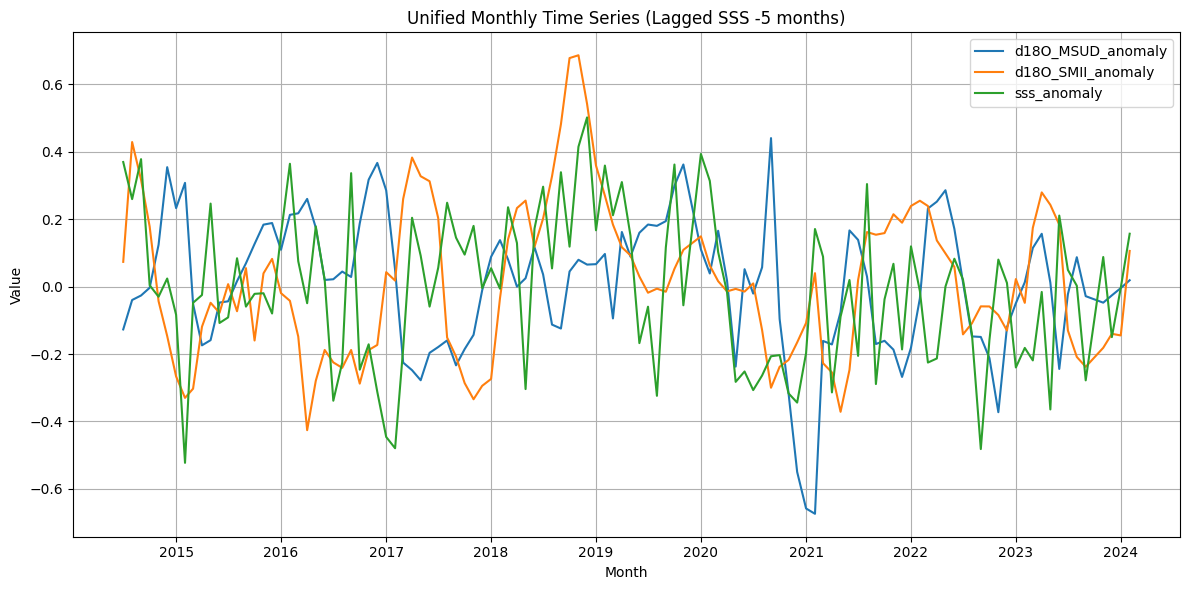

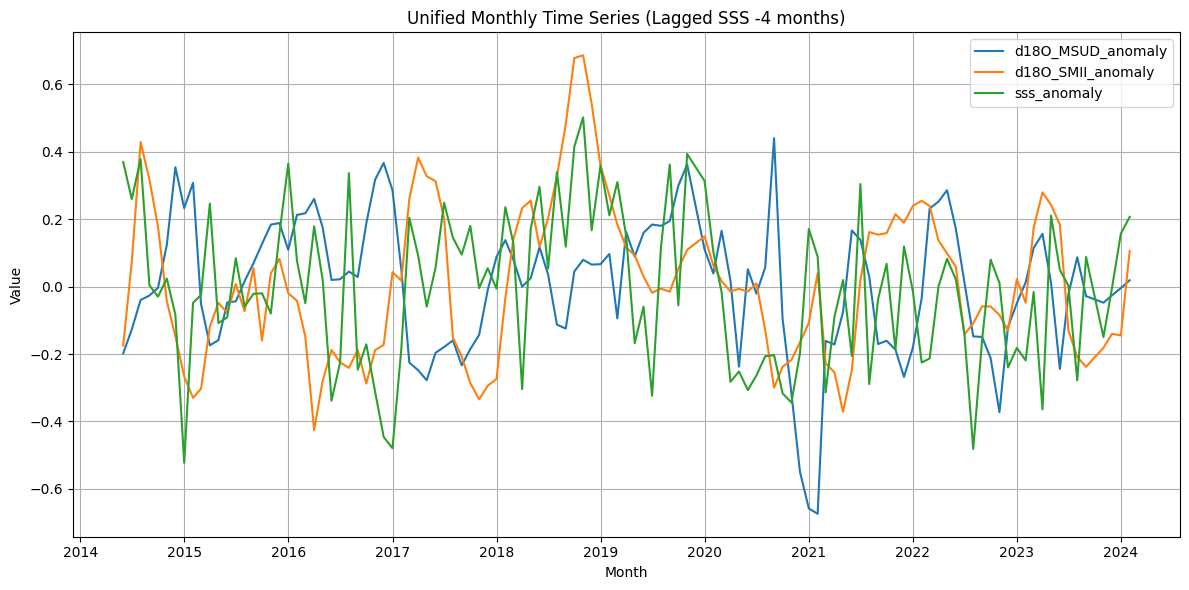

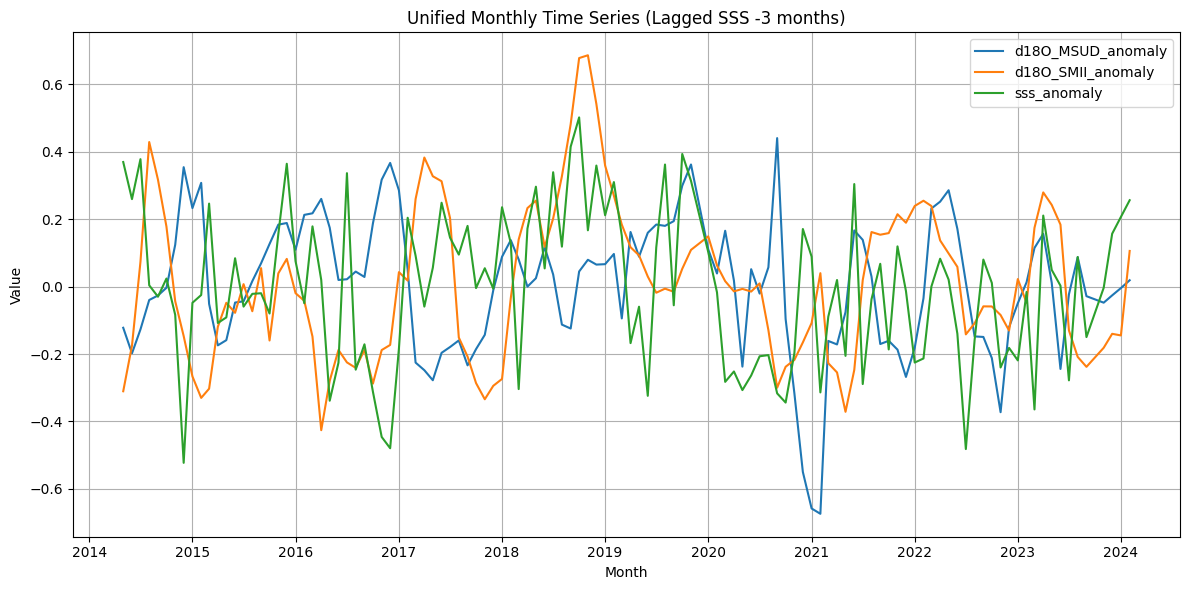

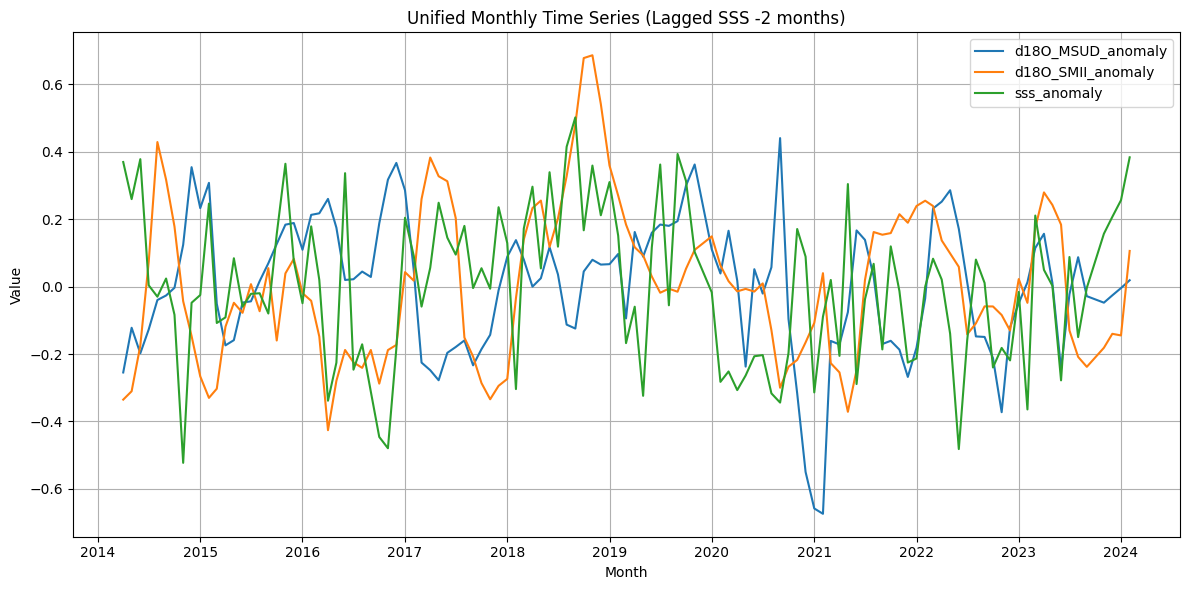

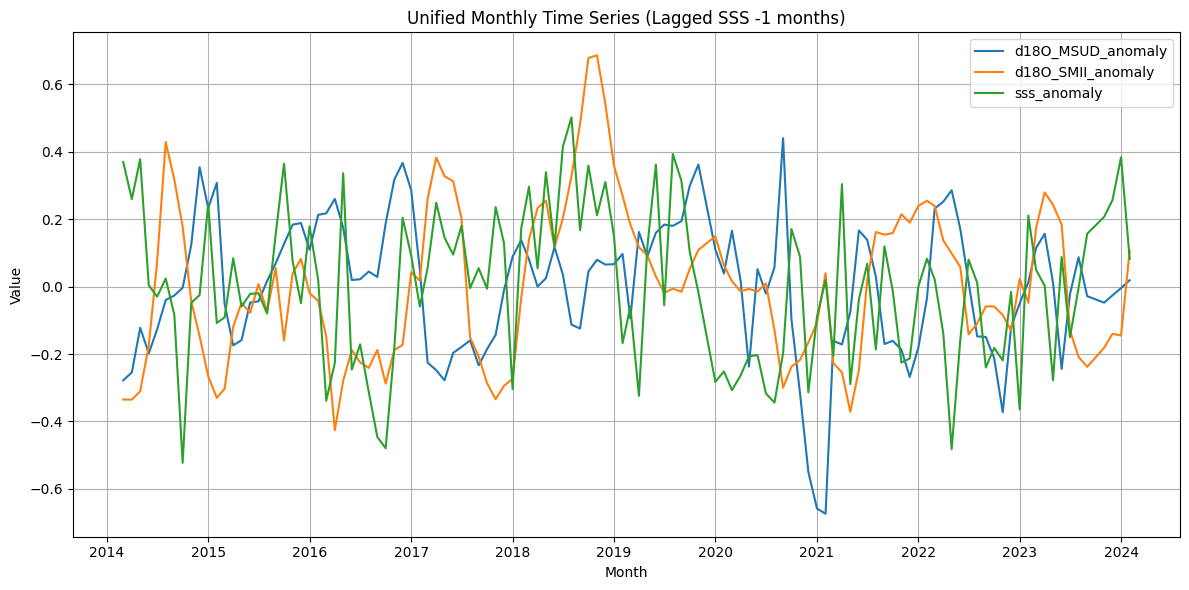

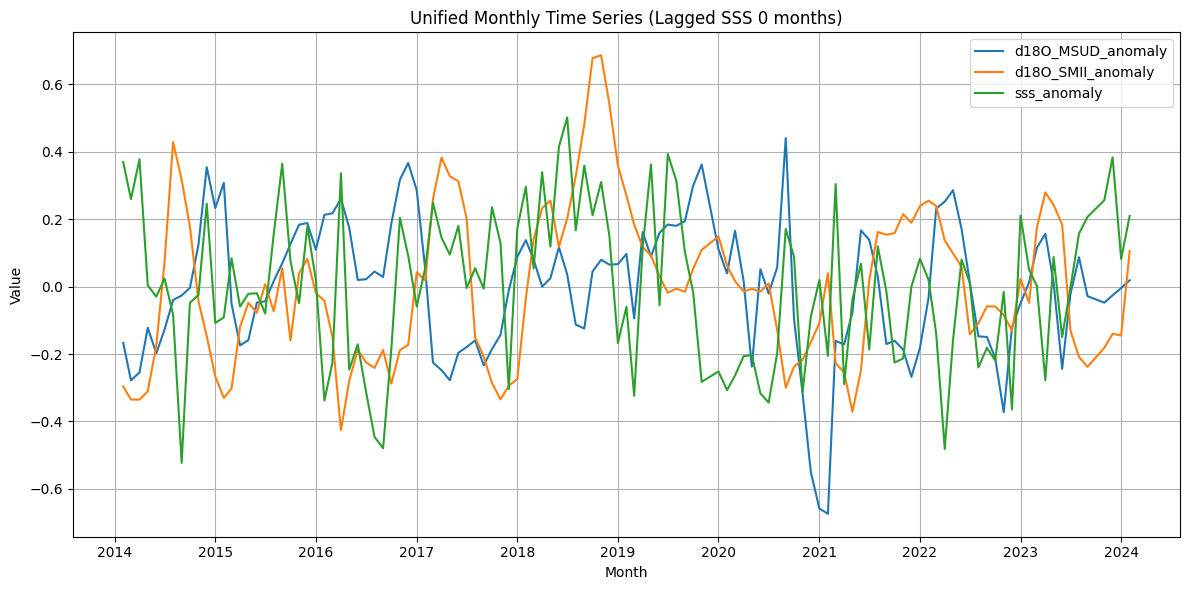

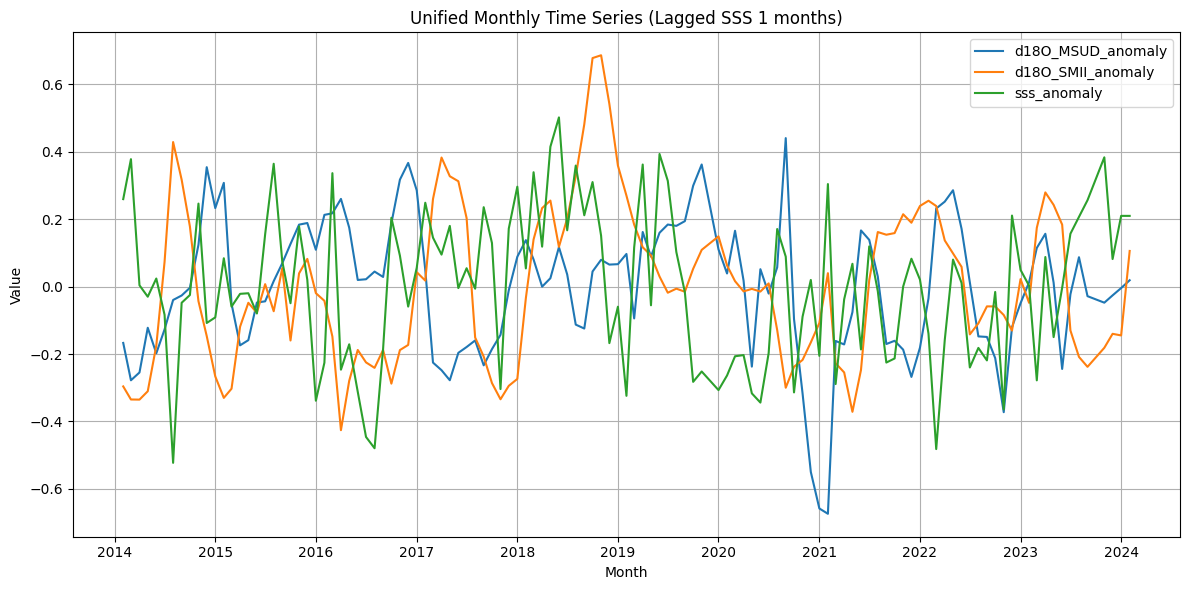

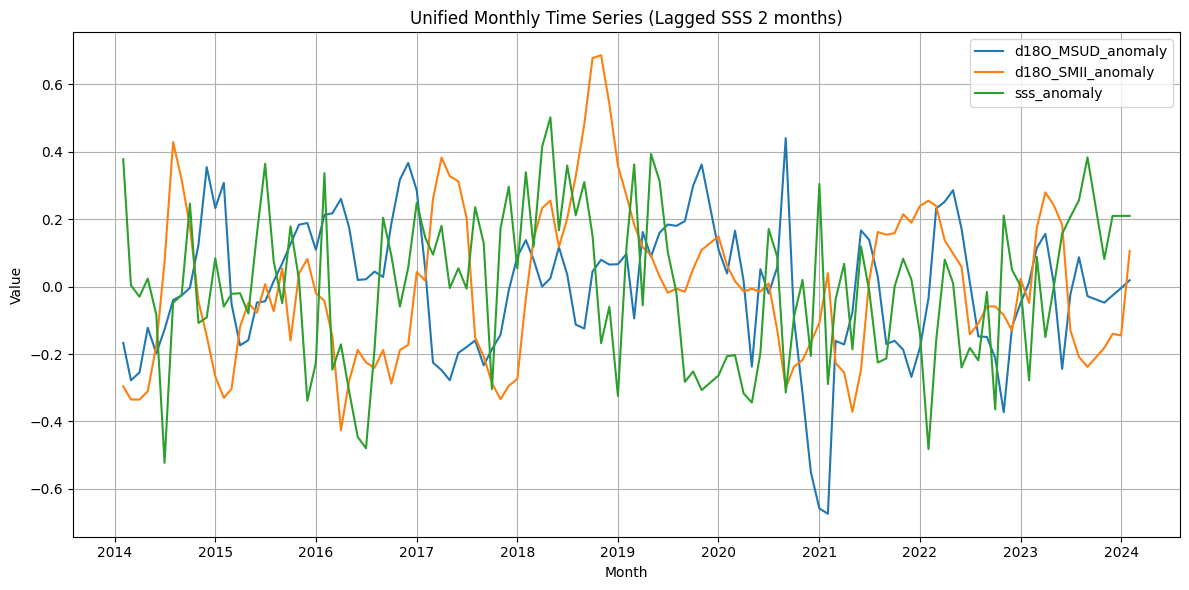

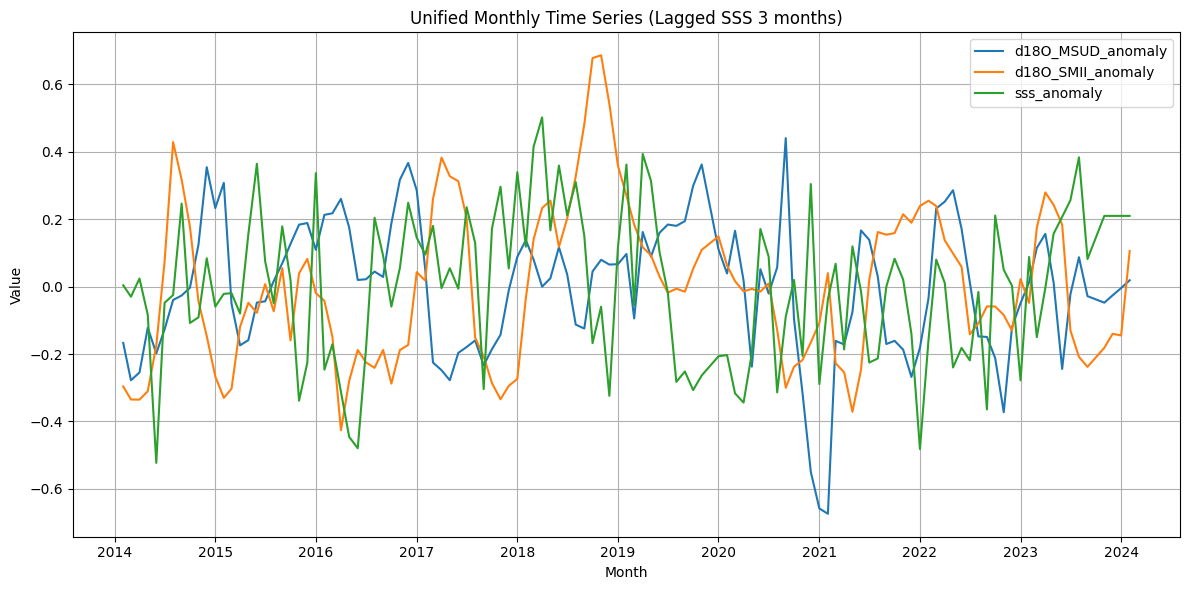

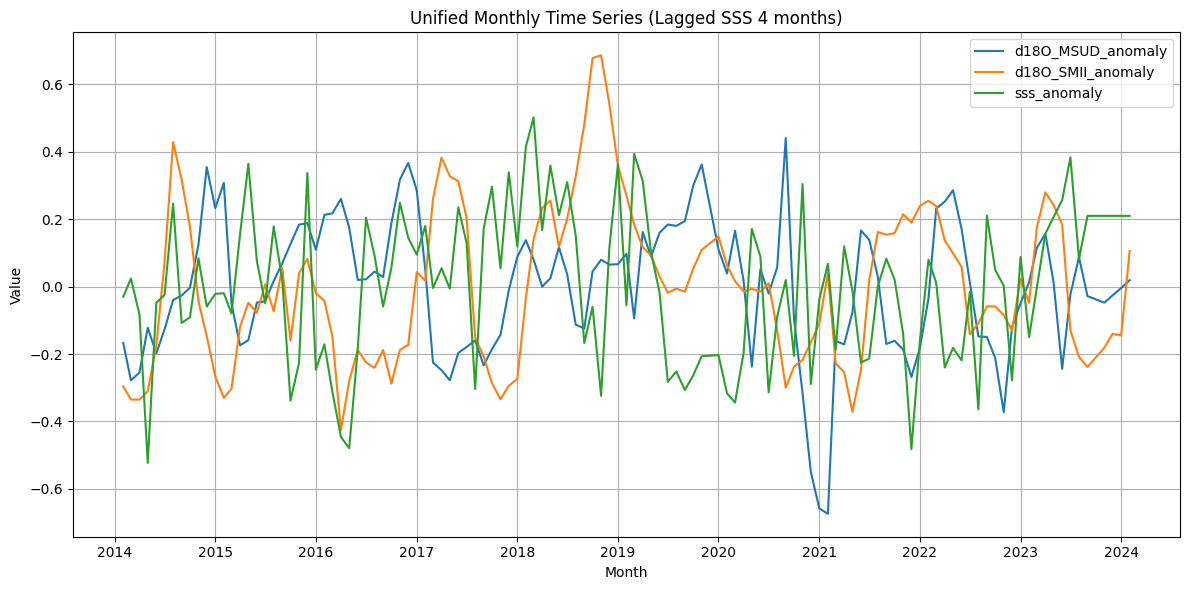

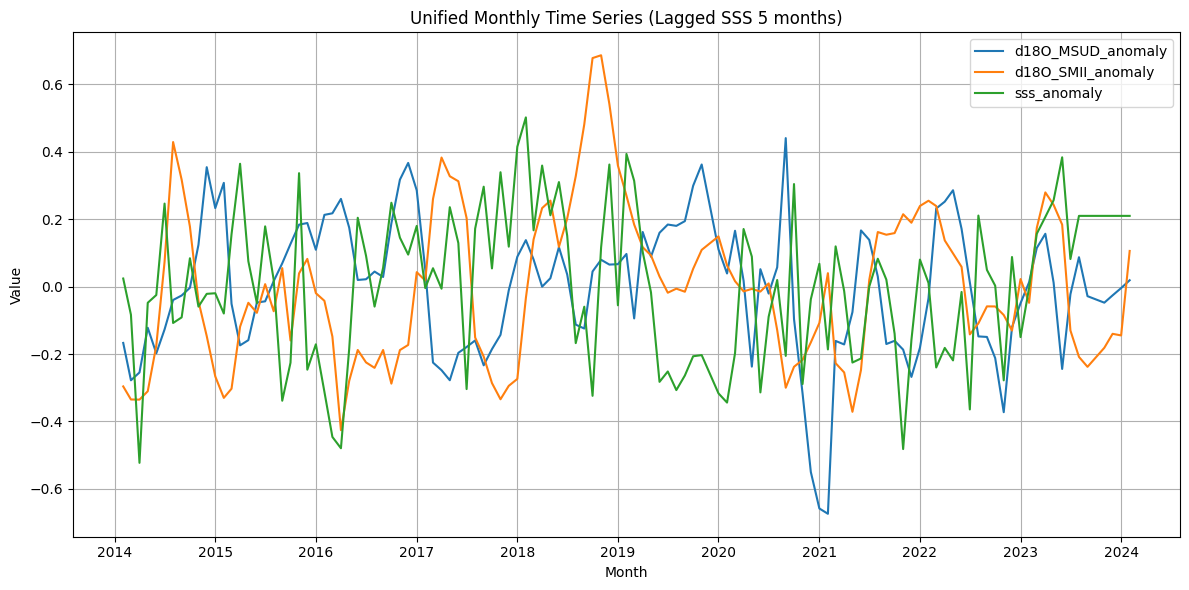

In [17]:
# Graph the lagged features on the same plot
for i in range(-5, 6):
    if i == 0:
        lagged_df = df
    else:
        lagged_df = dataframes[i]
    plt.figure(figsize=(12, 6))
    for col in df.columns:
        if col != "month" and col != "sos":
            plt.plot(lagged_df["month"], lagged_df[col], label=col)
    
    plt.title("Unified Monthly Time Series (Lagged SSS " + str(i) + " months)")
    plt.xlabel("Month")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:      d18O_MSUD_anomaly   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.05915
Date:                Mon, 11 Aug 2025   Prob (F-statistic):              0.808
Time:                        15:17:37   Log-Likelihood:                 23.817
No. Observations:                 114   AIC:                            -43.63
Df Residuals:                     112   BIC:                            -38.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.019      0.326      0.7

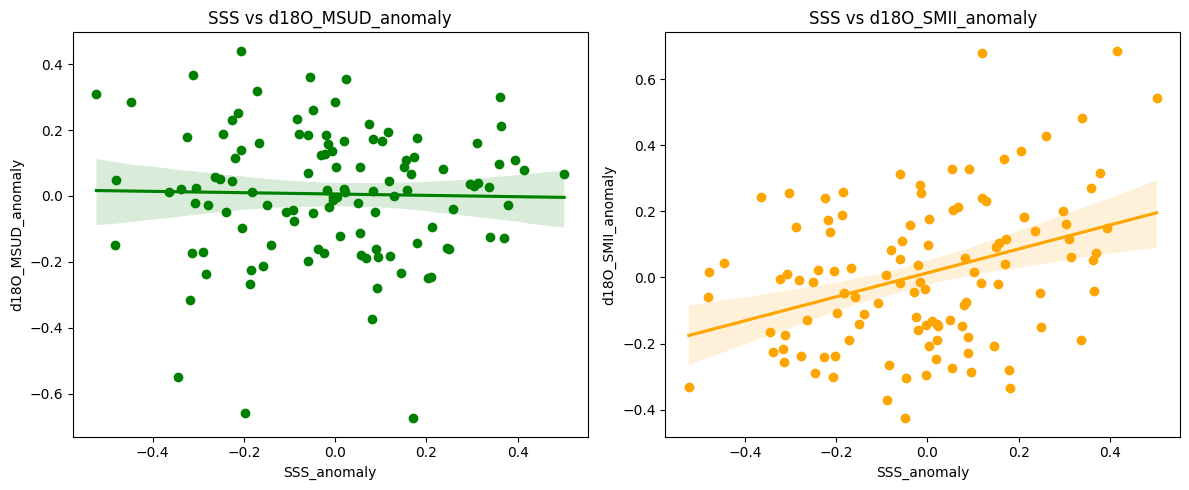

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:      d18O_MSUD_anomaly   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8432
Date:                Mon, 11 Aug 2025   Prob (F-statistic):              0.360
Time:                        15:17:38   Log-Likelihood:                 24.388
No. Observations:                 115   AIC:                            -44.78
Df Residuals:                     113   BIC:                            -39.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0043      0.018      0.232      0.8

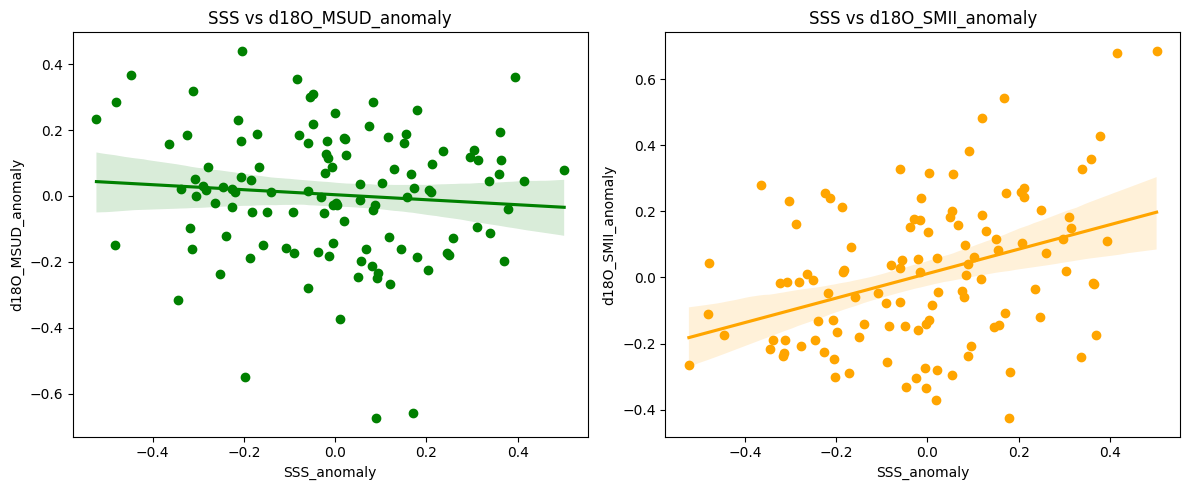

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:      d18O_MSUD_anomaly   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4765
Date:                Mon, 11 Aug 2025   Prob (F-statistic):              0.491
Time:                        15:17:38   Log-Likelihood:                 24.706
No. Observations:                 116   AIC:                            -45.41
Df Residuals:                     114   BIC:                            -39.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.018      0.174      0.8

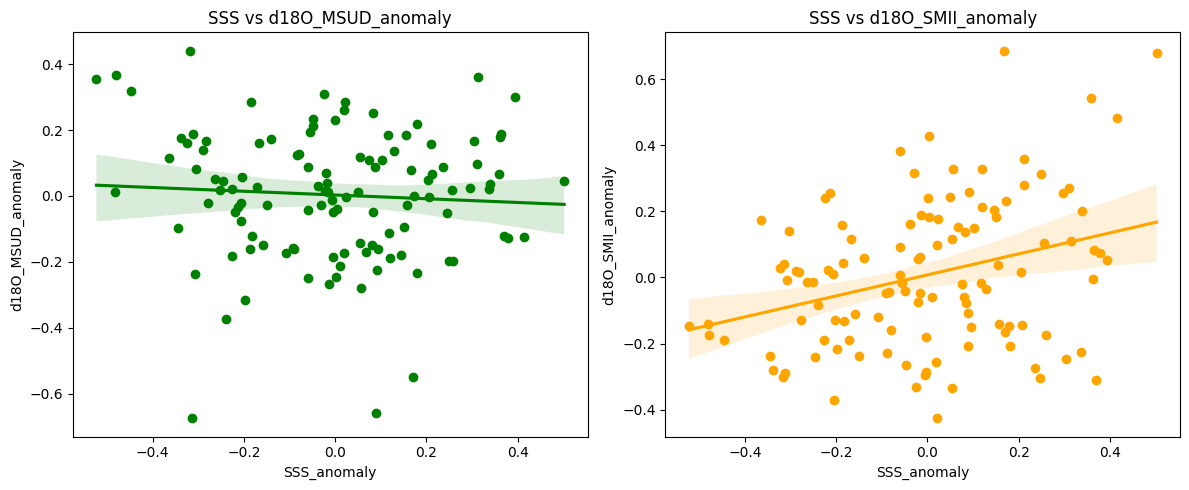

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:      d18O_MSUD_anomaly   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.1038
Date:                Mon, 11 Aug 2025   Prob (F-statistic):              0.748
Time:                        15:17:38   Log-Likelihood:                 24.370
No. Observations:                 117   AIC:                            -44.74
Df Residuals:                     115   BIC:                            -39.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.018      0.053      0.9

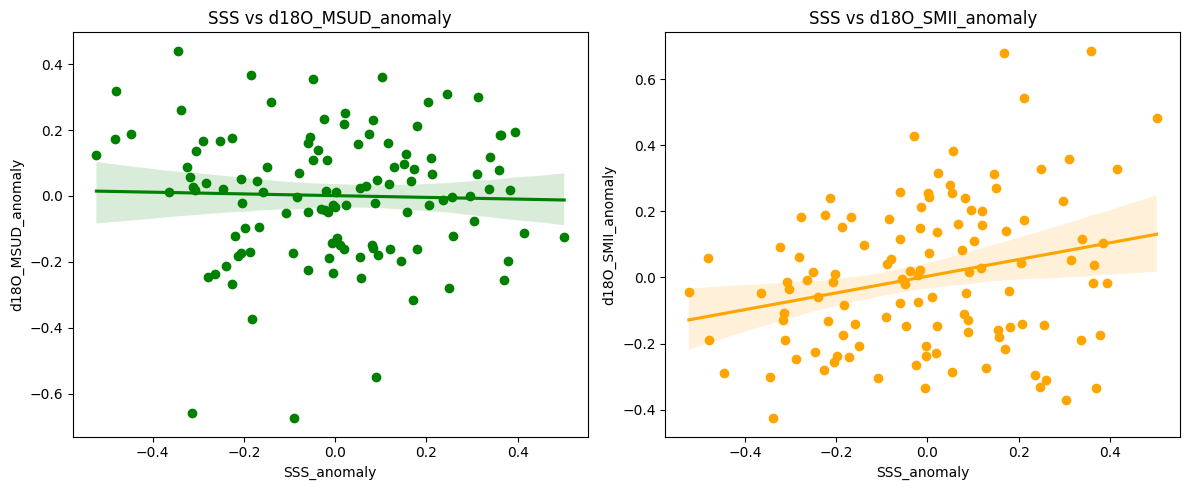

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:      d18O_MSUD_anomaly   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.2671
Date:                Mon, 11 Aug 2025   Prob (F-statistic):              0.606
Time:                        15:17:38   Log-Likelihood:                 24.164
No. Observations:                 118   AIC:                            -44.33
Df Residuals:                     116   BIC:                            -38.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.018     -0.076      0.9

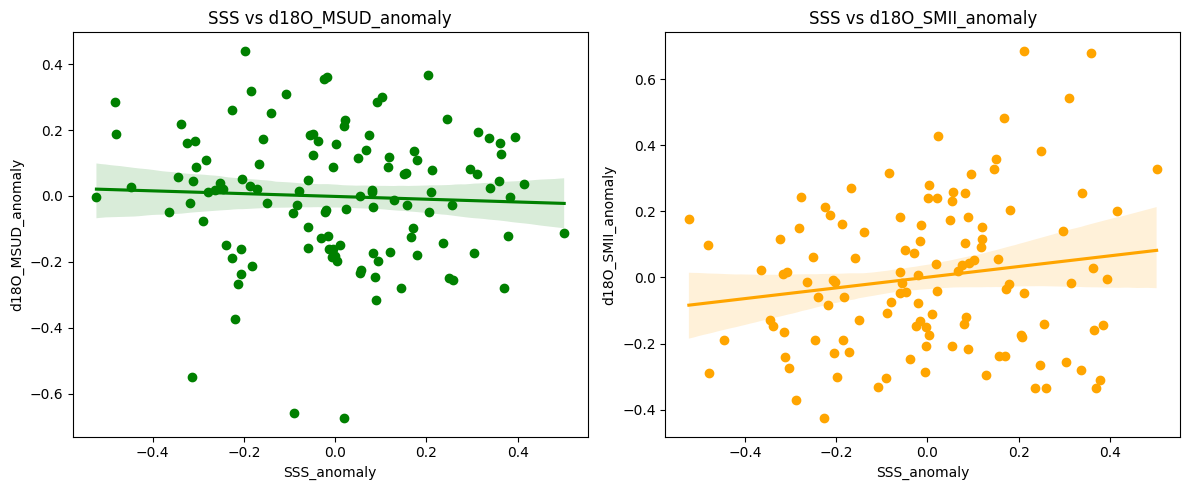

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:      d18O_MSUD_anomaly   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.04297
Date:                Mon, 11 Aug 2025   Prob (F-statistic):              0.836
Time:                        15:17:38   Log-Likelihood:                 24.405
No. Observations:                 119   AIC:                            -44.81
Df Residuals:                     117   BIC:                            -39.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.018     -0.152      0.8

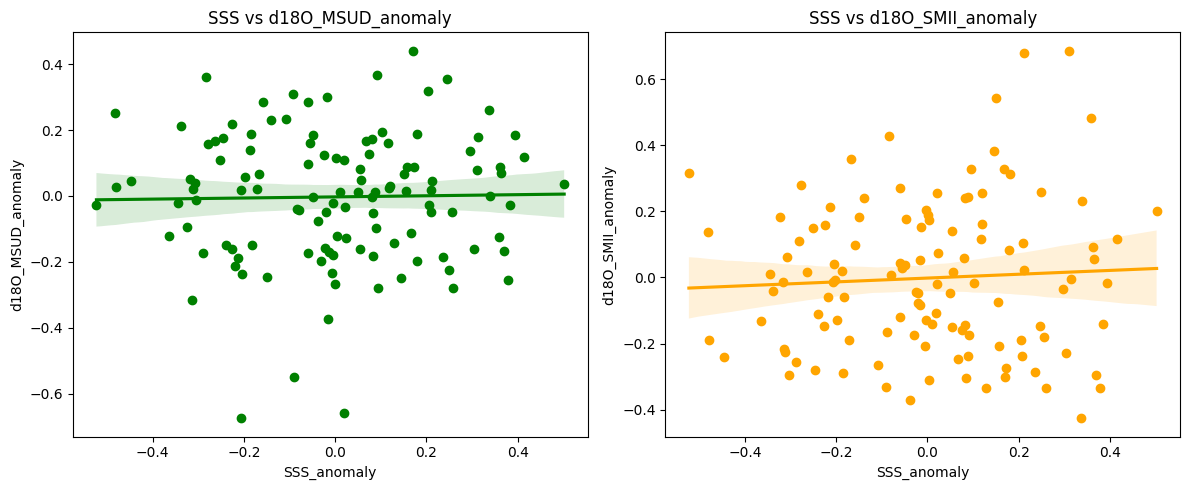

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:      d18O_MSUD_anomaly   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.08949
Date:                Mon, 11 Aug 2025   Prob (F-statistic):              0.765
Time:                        15:17:38   Log-Likelihood:                 24.428
No. Observations:                 119   AIC:                            -44.86
Df Residuals:                     117   BIC:                            -39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.018     -0.152      0.8

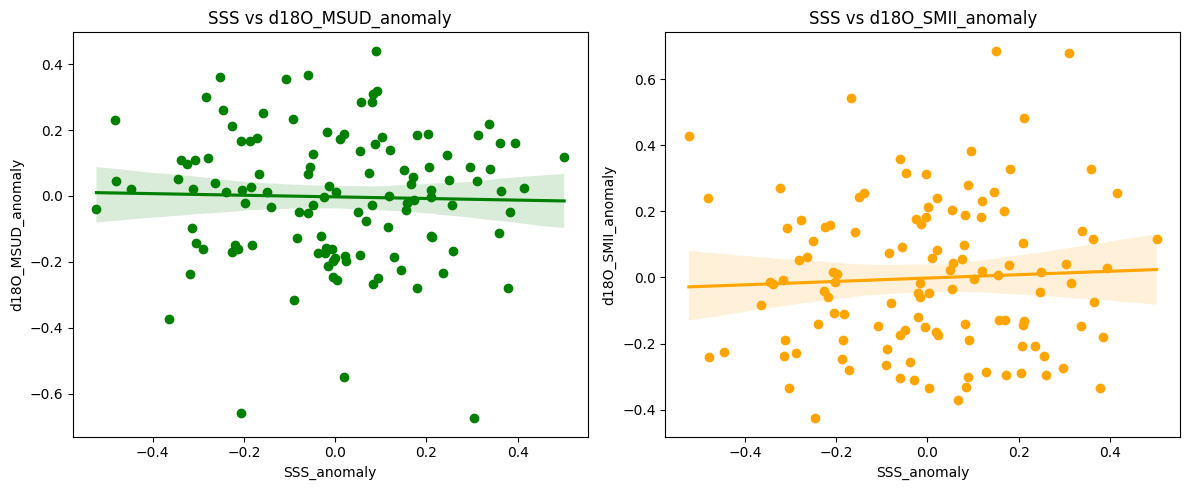

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:      d18O_MSUD_anomaly   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7282
Date:                Mon, 11 Aug 2025   Prob (F-statistic):              0.395
Time:                        15:17:39   Log-Likelihood:                 24.752
No. Observations:                 119   AIC:                            -45.50
Df Residuals:                     117   BIC:                            -39.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.018     -0.153      0.8

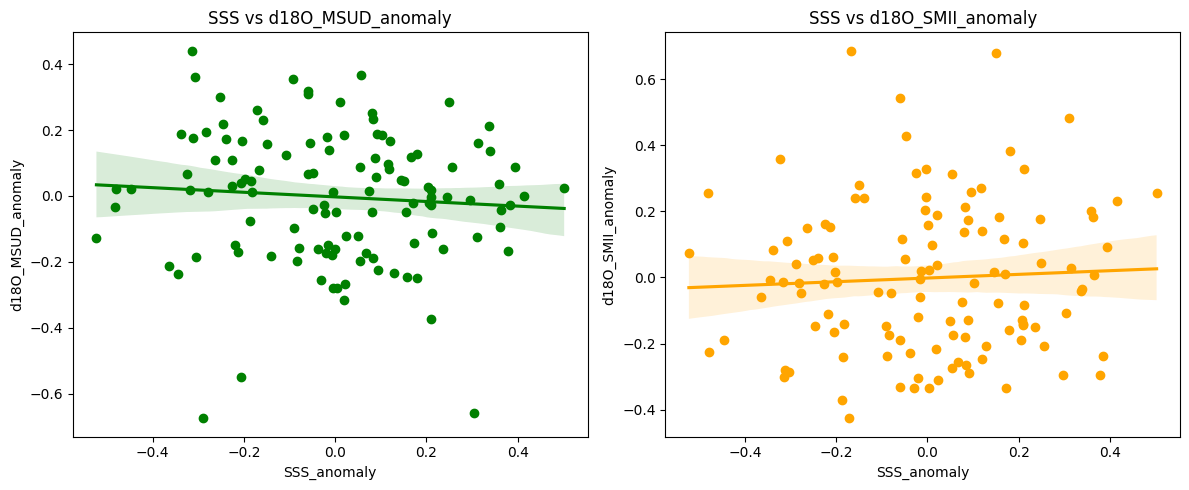

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:      d18O_MSUD_anomaly   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4185
Date:                Mon, 11 Aug 2025   Prob (F-statistic):              0.519
Time:                        15:17:39   Log-Likelihood:                 24.595
No. Observations:                 119   AIC:                            -45.19
Df Residuals:                     117   BIC:                            -39.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.018     -0.153      0.8

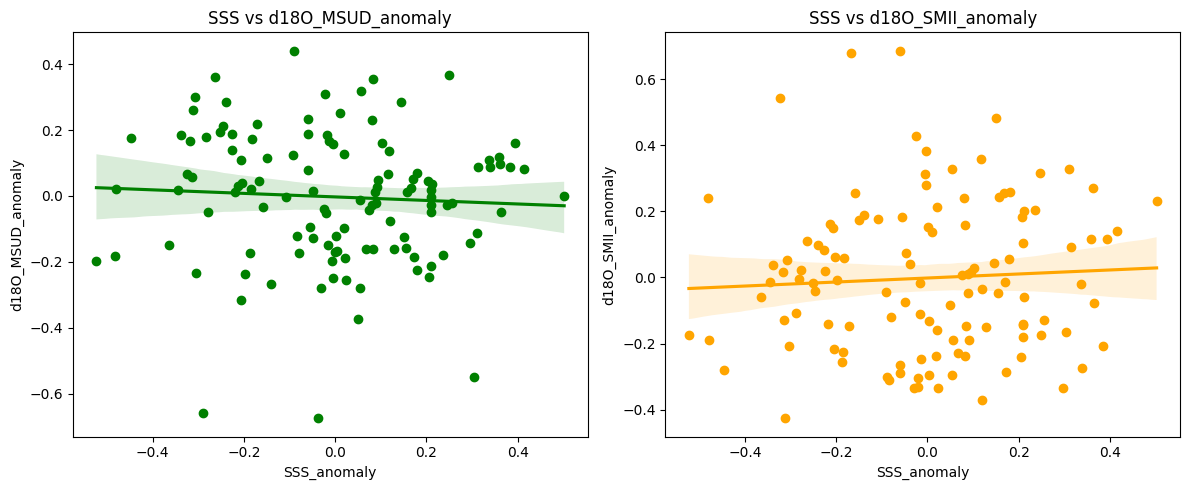

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:      d18O_MSUD_anomaly   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.450
Date:                Mon, 11 Aug 2025   Prob (F-statistic):              0.231
Time:                        15:17:39   Log-Likelihood:                 25.116
No. Observations:                 119   AIC:                            -46.23
Df Residuals:                     117   BIC:                            -40.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.018     -0.153      0.8

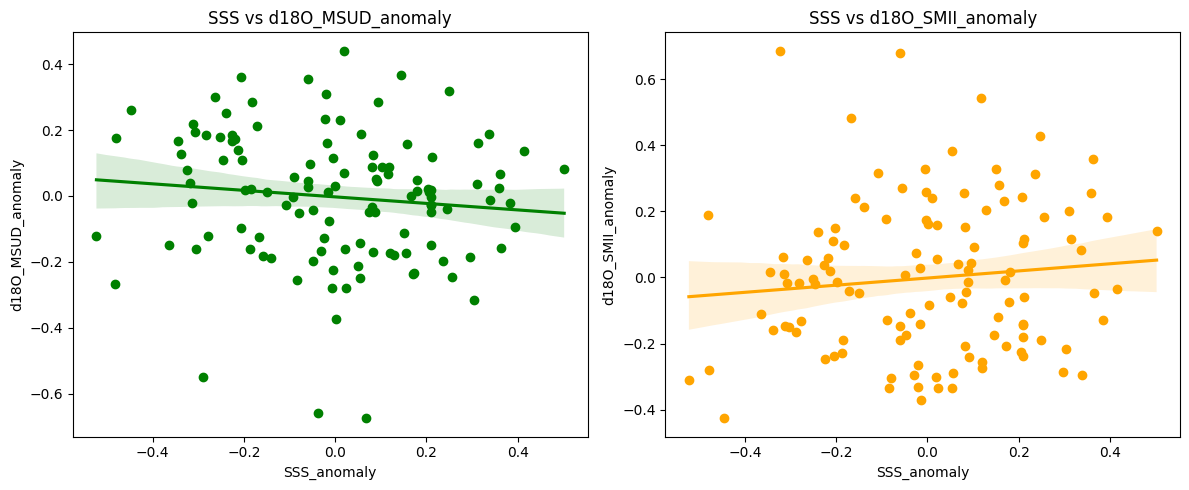

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:      d18O_MSUD_anomaly   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.474
Date:                Mon, 11 Aug 2025   Prob (F-statistic):              0.227
Time:                        15:17:39   Log-Likelihood:                 25.128
No. Observations:                 119   AIC:                            -46.26
Df Residuals:                     117   BIC:                            -40.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.018     -0.153      0.8

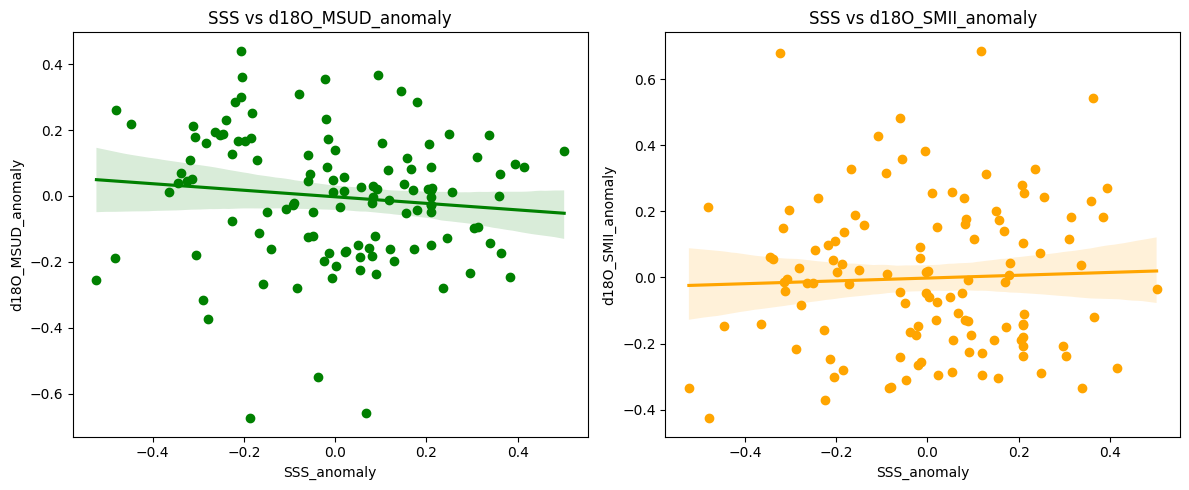

In [18]:
from IPython.display import display, HTML

# Multiple Linear Regression with lagged SSS
for i in range(-5, 6):
    if i == 0:
        df_lagged = df
    else:
        df_lagged = dataframes[i]
    print('-' * 100)
    display(HTML(f'<span style="font-size:20px; font-weight:bold;">Regression with lagged SSS {i} months:</span>'))
    X = df_lagged[['sss_anomaly']]
    y = df_lagged['d18O_MSUD_anomaly']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = sm.add_constant(X_scaled)
    model = sm.OLS(y, X_scaled).fit()
    print(model.summary())

    X_salinity = sm.add_constant(df_lagged['sss_anomaly'])
    model_salinity = sm.OLS(df_lagged['d18O_MSUD_anomaly'], X_salinity).fit()
    print("R² for SSS only:", model_salinity.rsquared)

    # Visualize
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].scatter(df_lagged['sss_anomaly'], df_lagged['d18O_MSUD_anomaly'], color='green')
    sns.regplot(x='sss_anomaly', y='d18O_MSUD_anomaly', data=df_lagged, scatter=False, ax=axs[0], color='green', line_kws={'label': 'Best Fit Line'})
    axs[0].set_title("SSS vs d18O_MSUD_anomaly")
    axs[0].set_xlabel("SSS_anomaly")
    axs[0].set_ylabel("d18O_MSUD_anomaly")

    axs[1].scatter(df_lagged['sss_anomaly'], df_lagged['d18O_SMII_anomaly'], color='orange')
    sns.regplot(x='sss_anomaly', y='d18O_SMII_anomaly', data=df_lagged, scatter=False, ax=axs[1], color='orange', line_kws={'label': 'Best Fit Line'})
    axs[1].set_title("SSS vs d18O_SMII_anomaly")
    axs[1].set_xlabel("SSS_anomaly")
    axs[1].set_ylabel("d18O_SMII_anomaly")

    plt.tight_layout()
    plt.show()